# Classificador

### Instruções de uso:
 
    - Informar o caminho das amostras em 'path_amostra' (formato geojson ou shp)
    - Informar o caminho da imagemem em 'path_raster' (formato tif)
    - Executar a célula 'importacoes' (Ctrl + Enter)
    - Executar a célula 'Script' 

In [1]:
# importacoes
from biblioteca.extracao import tabelar, validar_dados
from biblioteca.treinamento import preparar_dados_para_treino, treinar_modelo_gbm, metricas
from biblioteca.classificacao import classificar_arquivo

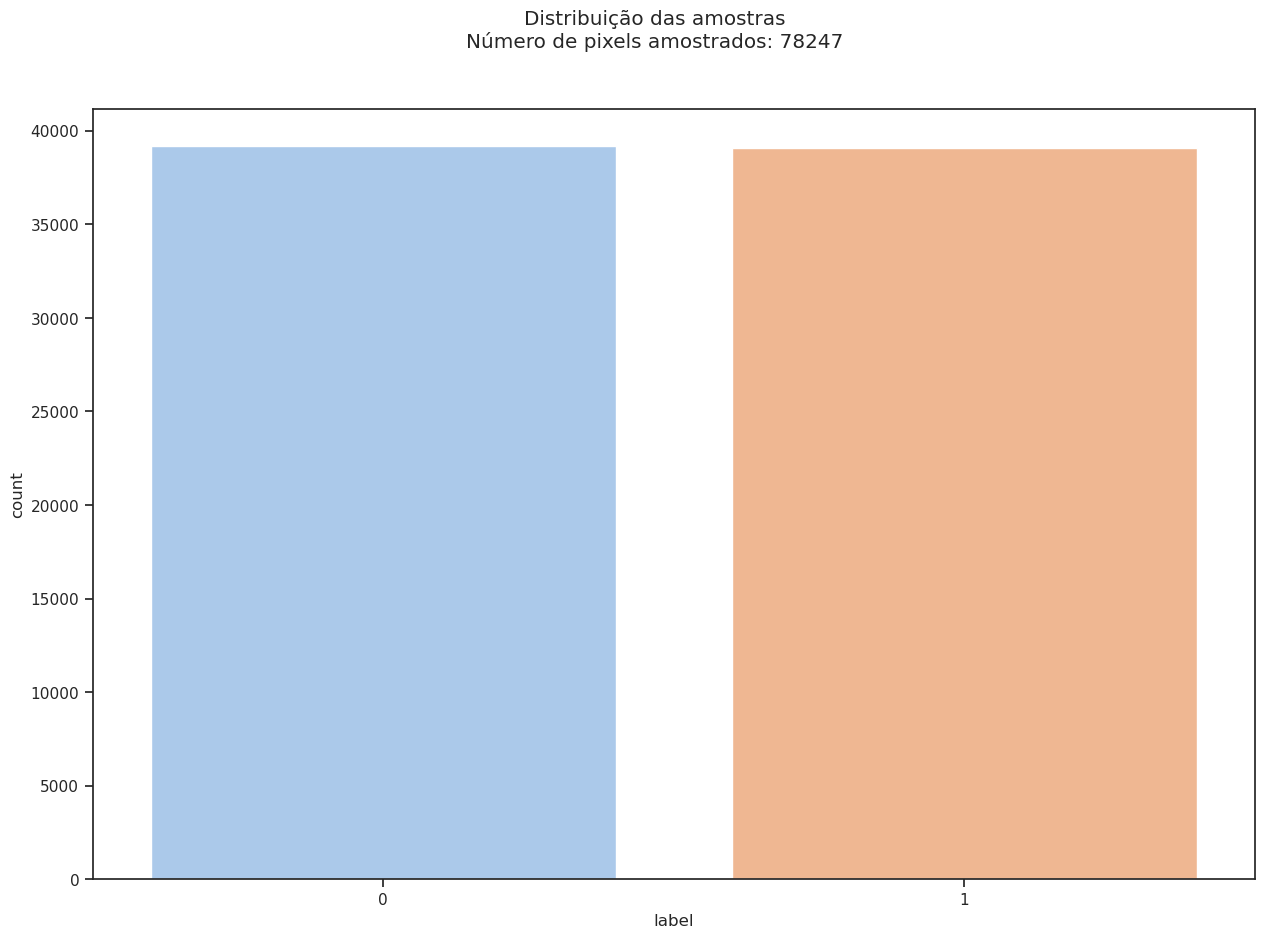

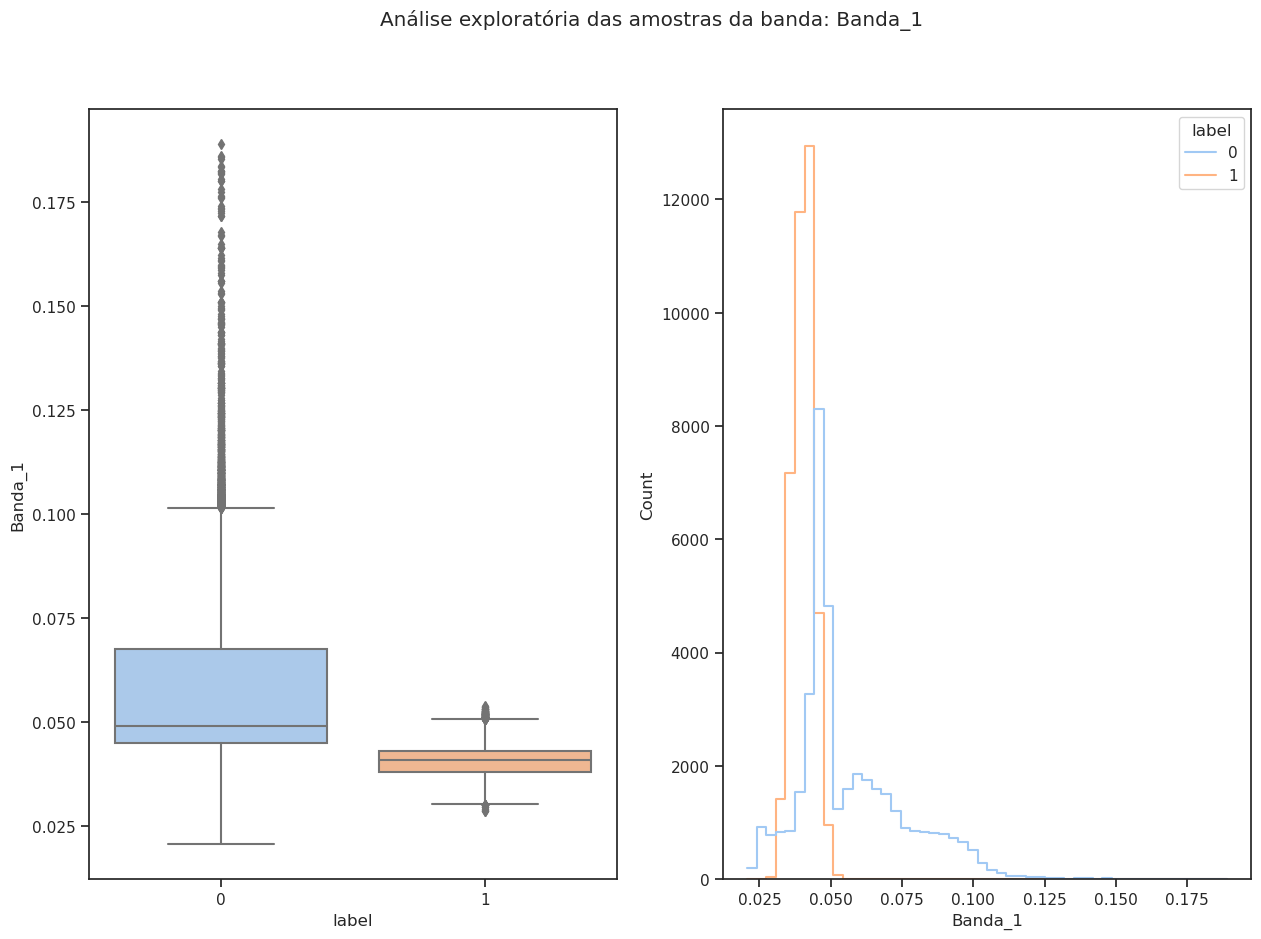

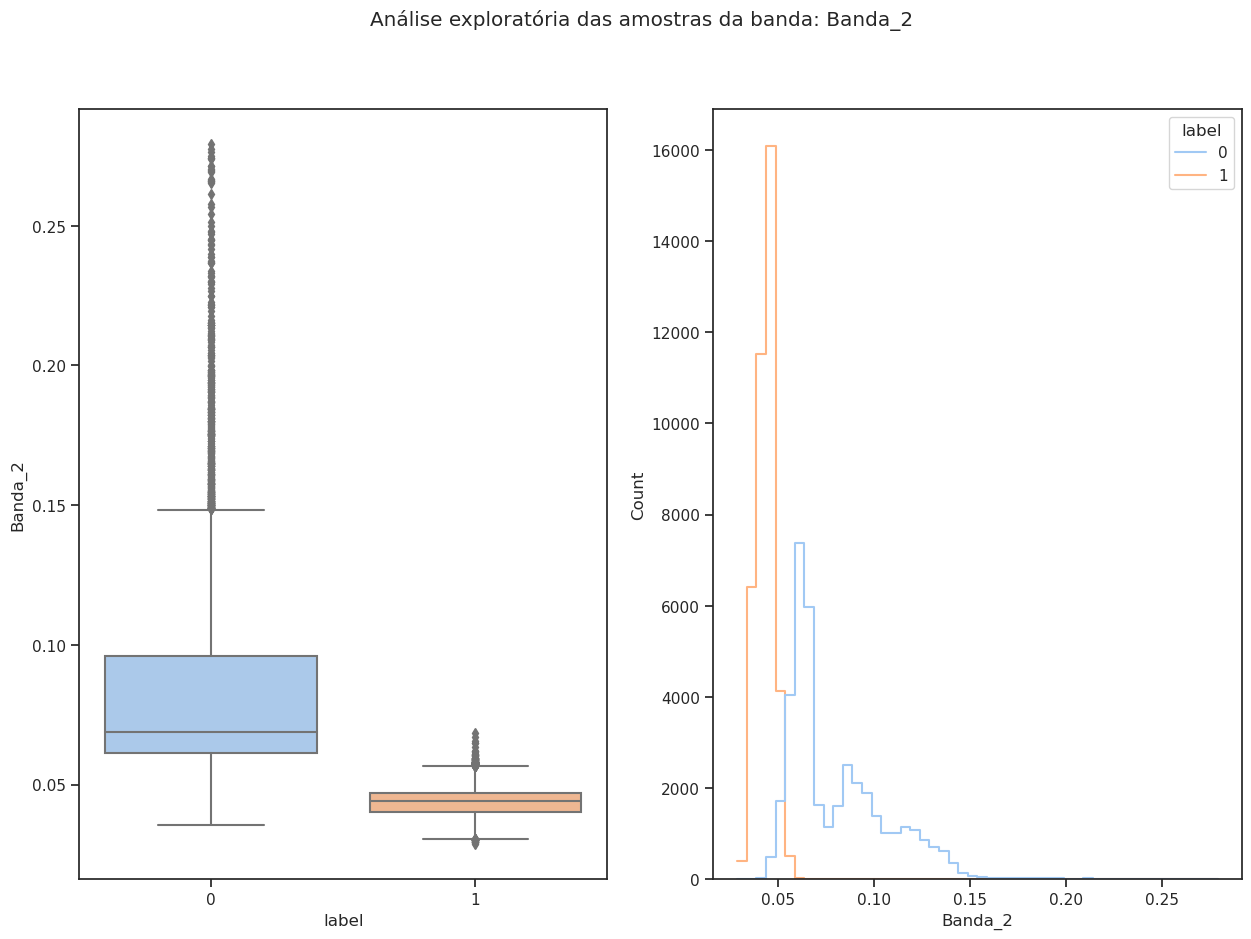

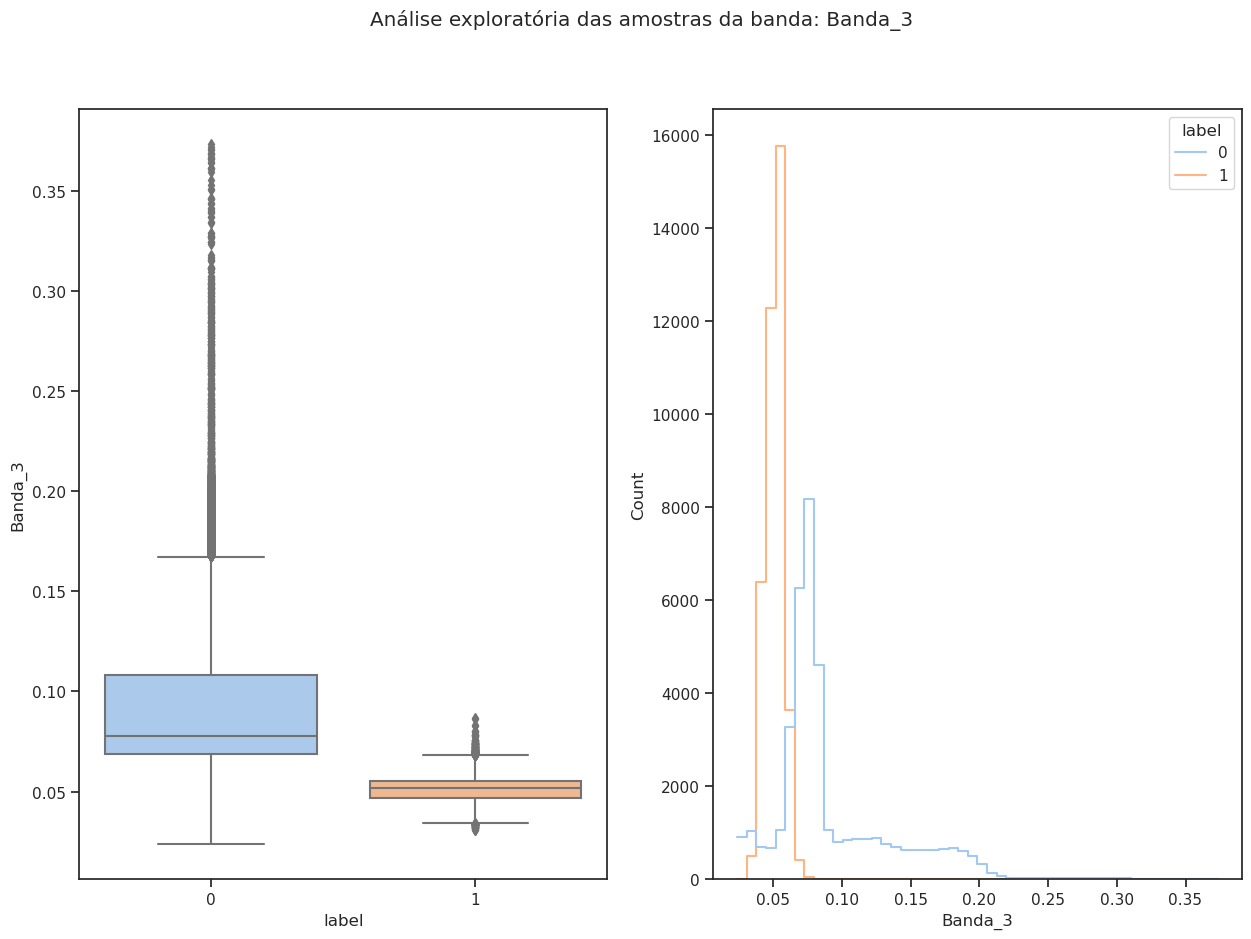

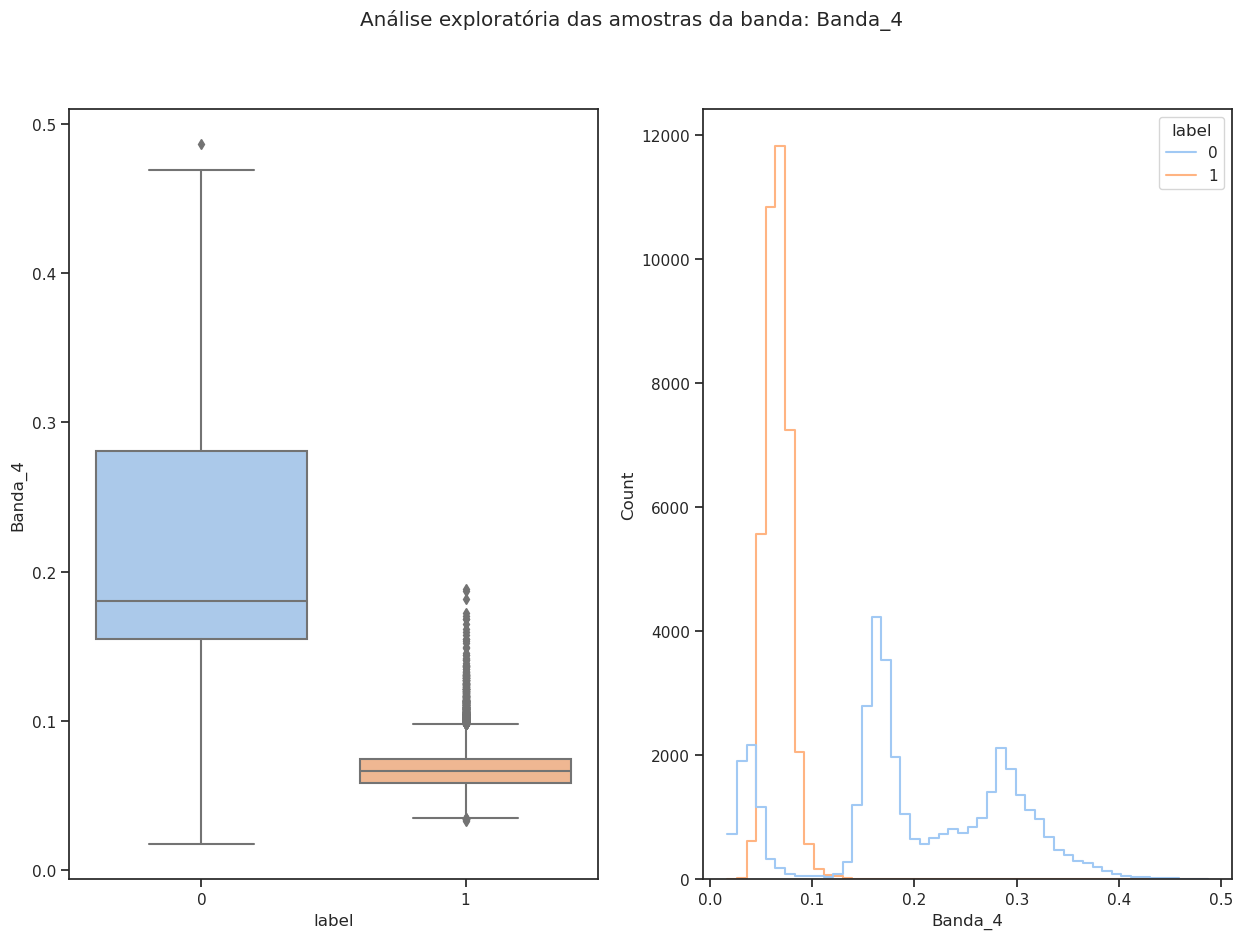

/home/lucas/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


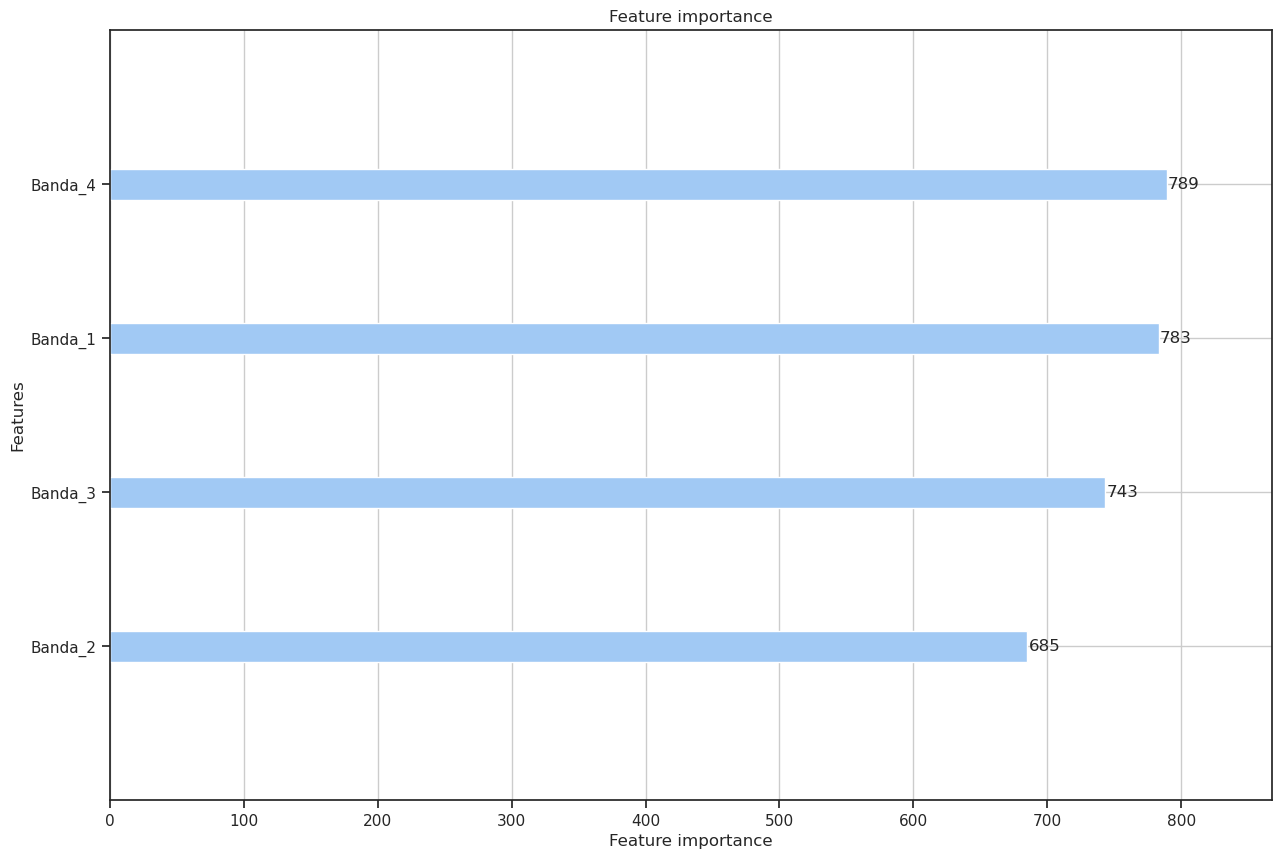

Validação:


,Classe,Sensibilidade,Especificidade,Acurácia,Suporte
0,0,0.999,0.999,-,1964
1,1,0.998,0.998,-,1949
2,Total,-,-,0.999,3913


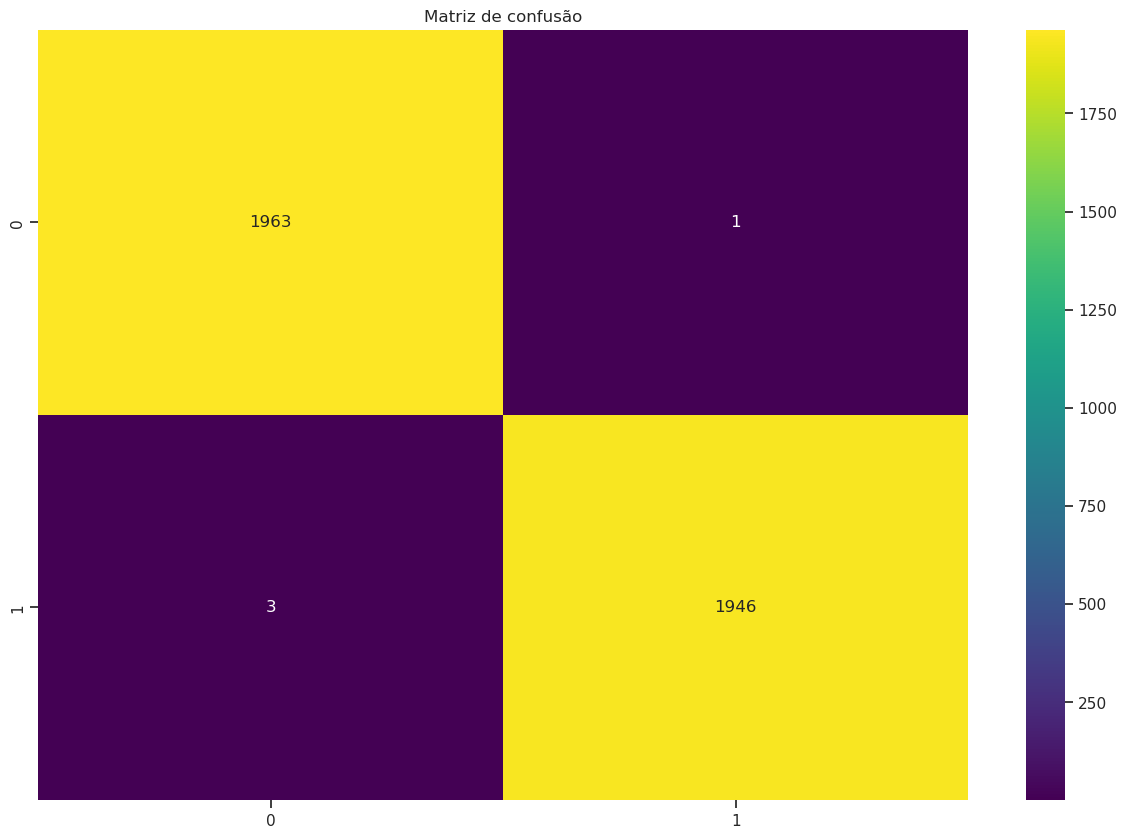

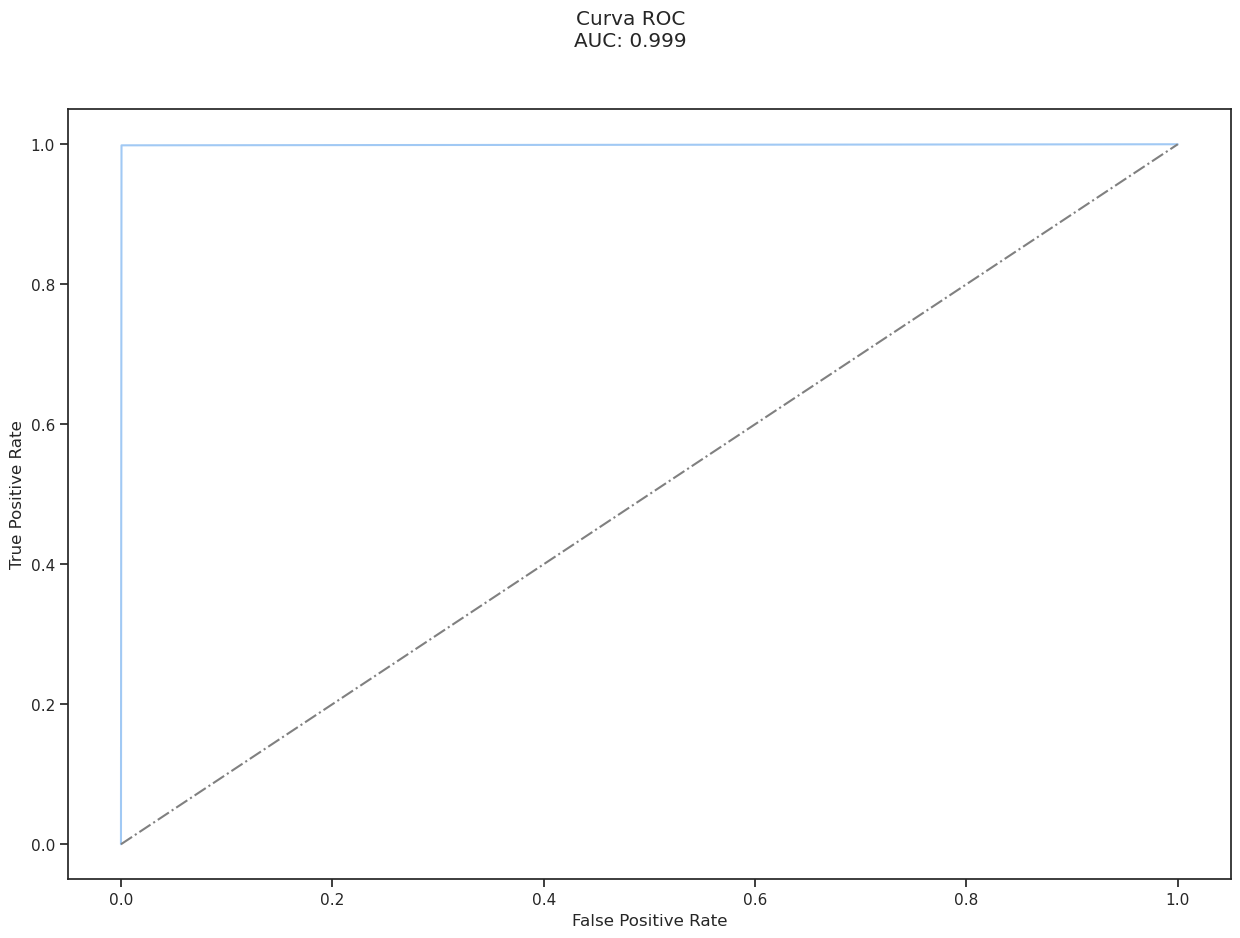

/home/lucas/sandbox/tcc_mba/git/classificador/testes/queimada/02092022.tif
--- 0.37526607513427734 seconds ---
--- 0.37495875358581543 seconds ---
--- 0.3467564582824707 seconds ---
--- 0.31711387634277344 seconds ---
Classificado


In [2]:
# Script

# Entrada dos dados
path_amostra = '/home/lucas/sandbox/tcc_mba/git/classificador/testes/queimada/treino.geojson'
path_raster  = '/home/lucas/sandbox/tcc_mba/git/classificador/testes/queimada/02092022.tif'

# validacao dos dados
validacao = validar_dados(path_amostra, path_raster)

if len(validacao['erro'])==0:
    # extracao das informacoes
    dados_brutos = tabelar(validacao['amostras'], path_raster, graficos=True)
    dados_preparados = preparar_dados_para_treino(dados_brutos, validacao['amostras'])

    # treinamento do modelo
    modelo = treinar_modelo_gbm(dados_preparados)
    metricas(modelo, dados_preparados[1], dados_preparados[3])

    # Classificacao da imagem inteira
    classificar_arquivo(path_raster, modelo)